<a href="https://colab.research.google.com/github/DavidMcK9509/spotify-workshop/blob/master/Spotify_Workshop_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starting off 

##### Try out the following commands in the code block below, replacing the "____________" sections with your code

1.   print("Hello World) 

1.   name = "My name"
2.   print(name)

2.   print(5 * 10)

If your code isn't running make sure you have pressed "Connect" in the top right hand corner

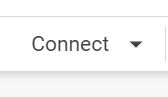



In [ ]:
"__________" # print("Hello World")
#Make sure you remember the speech marks and don't capatalise the p of print!

In [ ]:
"__________" #name = "My name" 
"__________" #type print(name)

In [ ]:
"__________" #print(5*10)

# Day 1

## Setup

### Package Import

In [ ]:
# Install external packages for Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install rasterfairy-py3 spotipy umap-learn -q

###### **<font color='blue'>TO DO 1</font> :** import the `Image` module from the `PIL` package

In [ ]:
# Import packages
from getpass import getpass        # secure text entry
from io import BytesIO             # reading binary data
from IPython.display \
  import clear_output              # clearing cell output
from sklearn.preprocessing \
  import StandardScaler            # feature standardisation
# TODO 01 Import the Image module from the PIL package
# (remember: exact capitalisation matters!)
"_____________"                    # image export 

'_____________'

###### **<font color='blue'>TO DO 2</font> :** import the spotify package

In [ ]:
import numpy as np                 # mathematics
import os                          # setting environment variables
import pandas as pd                # storing audio features as dataframe
import plotly.express as px        # basic interactive visualisation
import plotly.graph_objects as go  # advanced plotting functionality
import rasterfairy                 # rasterfying point clouds
import requests                    # web requests
#TODO 02: import the spotipy package
"______________"                   # Python interface to Spotify API
import umap                        # dimensionality reduction

### Parameters

###### **<font color='blue'>TO DO 3</font> :** assign your username to the variable 'USERNAME'


In [ ]:
# Parameters
# NB: Use 'mkprtr' for playlists from AZ Code Club
# TODO 03: supply a username
USERNAME = '_________________________'  # user to extract public playlists from
RESOLUTION = 2  # 0 (extreme); 1 (high); 2 (low)
ORIENTATION = 'landscape'  # landscape; portrait
MIN_RATIO = 0.5  # minimum ratio between shortest and longest dimension

In [ ]:
# CKPT: Use `print(USERNAME)` to check that the username has been set correctly
"_____________"

	111518349


'_____________'

### Helper Functions
#### You don't need to look at this but feel free if you are interested. Remember to run it though! 

In [ ]:
# Define helper functions
def depaginate(first_page):
  """
  Flatten the paginated response from the Spotify API.
  
  The Spotify API returns responses over a certain size using pagination (like
  how Google has multiple page of results). This function takes the first page
  of a response and uses this to run through all other pages and return the
  page items in a flattened format.
  """
  page = first_page
  while page:
    for item in page['items']:
      yield item
    page = sp.next(page)

def resolution_map(resolution):
  """Return the pixel value corresponding to different resolution levels."""
  return [600, 300, 64][resolution]

def mel_to_harm(key):
  """Convert absolute keys to positions relative to the circle of fifths."""
  return (key * 7) % 12

def create_hover_text(track_df, features=None):
  """
  Create hover text for plots.
  
  Omit the second argument to leave out extra hover text for audio features.
  """
  text = (
      "Name: " + track_df['name'] + "<br>" +
      "Artist: " + track_df['artist'] + "<br>" +
      "Album: " + track_df['album'] + "<br><extra>"
  )
  if features:
    for f in features:
      text = text + f + ": " + track_df[f].apply(str) + "<br>"
  return text + "</extra>"

def find_valid_sample_count(track_df, min_ratio):
  """
  Find a sample count that can form a rectangle satisfying a minimum ratio.

  For difficult numbers of observations (e.g. a prime), only long rectangles
  can be formed in the final visualisation. We therefore keep decreasing the
  number of points until we have form a rectangle that satisfies a minimum
  ratio between side lengths.
  """
  n = len(track_df)
  found_solution = False
  while not found_solution:
    i, j = rasterfairy.getRectArrangements(n)[0]
    if i / j >= MIN_RATIO:
      found_solution = True
    else:
      n -= 1
  return n

### API (Application Programming Interface) Connection
#### Set-up a connection between Python and Spotify

###### **<font color='blue'>TO DO 4</font> :** add a line asking for the client secret and assign it to the `SPOTIPY_CLIENT_SECRET` environment variable (base client ID line bellow)
If you don't have your client ID and client Secret use:

Client ID - 460a1a32216c4e8f9bdf5c236975bf13

Client Secret - 851c13e3aa544cfd85a0a06e43f8cd70

In [ ]:
# Authentication environment variables
overwrite_existing = False  # set to True to overwrite existing values
if overwrite_existing or 'SPOTIPY_CLIENT_ID' not in os.environ \
    or 'SPOTIPY_CLIENT_SECRET' not in os.environ:
  # NB: the input passed to `getpass` is the question asked to the user
  # `\n` means create a newline before creating the answer box
  os.environ['SPOTIPY_CLIENT_ID'] = getpass("What is your client ID?\n")
  # TODO 04: ask for the client secret and assign it to the
  # `SPOTIPY_CLIENT_SECRET` environment variable (base this on the line above)
  "____________________________________________________________________________"

In [ ]:
# Initialise client
auth_manager = spotipy.SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
# CKPT: Run `sp.categories(country='GB', limit=3)` to list the first three
# categories in Great Britain. NB: This returns a dictionary with more
# dictionaries and lists nested inside
"__________________________________"

## Data Scraping

### Collect Playlists

In [ ]:
# Create list to store key playlist information
playlist_info = []

###### **<font color='blue'>TO DO 5</font> :** add the `id` field to the playlist information below

In [ ]:
# Loop through all playlists
for playlist in depaginate(sp.user_playlists(USERNAME)):
  # Add playlist information to list
  playlist_info.append({
      'name': playlist['name'],
      'size': playlist['tracks']['total'],
      # TODO 05: add the `id` field to the playlist information
      # This will look very similar to 'name' above
      "___________________",
  })

In [ ]:
# CKPT: What does `playlist_info` look like? Use `print()` to find out
"__________________"

In [ ]:
# Display playlist choices
max_digits = len(str(len(playlist_info)))
for i, info in enumerate(playlist_info):
  print(f"({str(i).zfill(max_digits)}) {info['name']} [{info['size']} tracks]")

### Playlist Selection

In [ ]:
# Get user to select a playlist
valid = False  # placeholder to start off loop

while not valid:
  # Ask user for input
  choice_idx = input("Select a playlist index from the list above:\n")
  # Check if the input was valid
  valid = choice_idx.isnumeric() and 0 < int(choice_idx) <= len(playlist_info)
  if not valid:
    clear_output(wait=True)
    print(f"Selection must be an integer between 1 and {len(playlist_info)}")

# Python returns input as text so convert to an integer
choice_idx = int(choice_idx)
print(f"\nYou selected '{playlist_info[choice_idx-1]['name']}'")

### Collect Tracks Details

###### **<font color='blue'>TO DO 6</font> :** create an empty list called `track_info` (see Collect Playlists)

In [ ]:
# Get the ID of the choosen playlist
choice_id = playlist_info[choice_idx-1]['id']
# Create list to store key playlist information
# TODO 06: create an empty list called `track_info` (see Collect Playlists)
"_____________"

# Loop through all playlist items
for item in depaginate(sp.playlist_items(choice_id)):
  # Extract track information, ignoring item metadata (e.g. date added)
  track = item['track']
  track_info.append({
      'name': track['name'],
      'artist': track['artists'][0]['name'],
      'album': track['album']['name'],
      # NB: some tracks are missing artworks for all/some resolutions. If this
      # is an issue, the simplest solution is to remove them from the playlist
      'art_url': track['album']['images'][RESOLUTION]['url'],
      'id': track['id'],
  })

In [ ]:
# CKPT: `track_info` might be quite a big object. Print out the second entry
# using `print(track_info[1])` (remember that we start from zero!)
"__________________"

# Day 2

### Collect Audio Features

###### **<font color='blue'>TO DO 7</font> :** add valence and tempo to the end of the list of included features

In [ ]:
# List features to collect. See: https://spoti.fi/2Rhrtye
# TODO 07: add valence and tempo to the end of the list of included features
included = (
    'duration_ms', 'key', 'mode', 'time_signature',
    'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
    'loudness', 'speechiness', '_______', '_____', 
)


In [ ]:
# Audio feature requests have to be performed in batches of at most 100 IDs
for offset in range(0, len(track_info), 100):
  # Collect all features
  features = sp.audio_features(t['id'] for t in track_info[offset:offset+100])
  # Filter to only include the features listed above
  features = [{k: v for k, v in t.items() if k in included} for t in features]
  # Add features to track info
  for i in range(min(100, len(track_info) - offset)):
    track_info[i + offset].update(features[i])

In [ ]:
# CKPT: Check the second element of `track_info` again to see the additions
"__________________"

In [ ]:
# Convert to dataframe
track_df = pd.DataFrame(track_info)

In [ ]:
# CKPT: Use `track_df.head()` to see the first few rows of the dataframe
# Can you remember how to see the last few rows?
"_____________"

## Pre-processing

### Sampling

###### **<font color='blue'>TO DO 8</font> :** find n, the maximum valid sample count by running the `find_valid_sample_count(...)` function with the two arguments `track_df`and `MIN_RATIO` (separate the arguments with a comma)

In [ ]:
# Find a sample count that satisfies the minimum ratio
# TODO 08: find n, the maximum valid sample count by running the
# `find_valid_sample_count(...)` function with the two arguments `track_df`
# and `MIN_RATIO` (separate the arguments with a comma)
n = "__________________________________________"

# Take random sample of chosen size
print(f"Randomly removing {len(track_df) - n} tracks to leave {n} remaining")
sampled_track_df = track_df.sample(n, random_state=1729).reset_index(drop=True)

In [ ]:
# CKPT: Print the dimensions of `track_df` using `print(track_df.shape)`
# Do the same for `sampled_track_df` for comparison
"___________________"
"___________________________"

###### **<font color='blue'>TO DO 9</font> :** drop the column containing the url for the cover art (see Collect Track Details to find its name)

In [ ]:
# Extract feature columns into own dataframe
# TODO 09: drop the column containing the url for the cover art
# (see Collect Track Details to find its name)
features_df = sampled_track_df.drop(
    ['name', 'artist', 'album', '_______', 'id'], axis=1
)

In [ ]:
# CKPT: Whereas `.shape` gives the dimensions, `.columns` gives us column
# names. Use this to print the columns of `features_df` and `sampled_track_df`
"_____________________________"
"_______________________"

### Feature Engineering
#### This code helps incorparate which key each song is in as a feature that determines where it goes on your visual

In [ ]:
# Transform key from polar coordinates using melodic distance
features_df['key_melodic_x'] = np.cos(features_df['key'] / 6 * np.pi)
features_df['key_melodic_y'] = np.sin(features_df['key'] / 6 * np.pi)

# Transform key from polar coordinates using harmonic distance
features_df['key_harmonic'] = features_df['key'].apply(mel_to_harm)
features_df['key_harmonic_x'] = np.cos(features_df['key_harmonic'] / 6 * np.pi)
features_df['key_harmonic_y'] = np.sin(features_df['key_harmonic'] / 6 * np.pi)

# Remove redundant columns
features_df.drop(['key', 'key_harmonic'], axis=1, inplace=True)

# Handle missing keys
features_df.iloc[:,-4:].fillna(0, inplace=True)

### Standardisation

###### **<font color='blue'>TO DO 10</font> :**  use `features_df` as an input to the `.fit_transform` method of the StandardScaler to standardise the features

In [ ]:
# TODO 10: use `features_df` as an input to the `.fit_transform` method of the
# StandardScaler to standardise the features
scaled_features = StandardScaler().fit_transform("_________")

# Two features represent the key so weight these a factor of one fourth
scaled_features[:,-4:] /= 2

## Dimensionality Reduction
#### We currently have data in 16 dimensions! Lets reduce that to something more managable!

### Embedding

###### **<font color='blue'>TO DO 11</font> :**  Set initial hyperparameter values to be 10 for `n_neighbors` and 0.5 for `min_dist`

In [ ]:
# Embedded the audio features into two dimensions
embedding = umap.UMAP(
    n_components=2,
    # Embedding hyperparameters used to balance local and global structure
    # See:
    #   https://pair-code.github.io/understanding-umap/
    #   https://umap-learn.readthedocs.io/en/latest/parameters.html
    # TODO 11: Set initial hyperparameter values to be 10 for `n_neighbors` and
    # 0.5 for `min_dist`
    "____________",
    "__________",
    metric='euclidean',
    # Random seed used for reproducibility
    random_state=1729).fit_transform(scaled_features)

###### **<font color='blue'>TO DO 12</font> :**  create a y variable alike the x variable below using the column with index 1

In [ ]:
# View embedding
x = embedding[:, 0]
# TODO 12: use the column with index 1 for the y variable
"_________________"

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    hovertemplate = '%{text}',
    # Add `included` as a second argument to show audio features on hover
    text=create_hover_text(sampled_track_df)
))

fig.update_traces(mode='markers')

fig.show()

### Rasterfication

In [ ]:
# Rasterfy embedding
grid, dims = rasterfairy.transformPointCloud2D(
    embedding[:, :], proportionThreshold=MIN_RATIO
)

# Fix grid type
grid = grid.astype(int)

# Fix orientation (portrait by default)
if ORIENTATION == 'portrait':
   pass
elif ORIENTATION == 'landscape':
  grid = grid[:, ::-1]
  dims = dims[::-1]
else:
  raise ValueError("invalid orientation")

###### **<font color='blue'>TO DO 13&14</font> :** plot markers rather than lines (see Embedding - TODO 12)

In [ ]:
# View rasterfied embedding
x = grid[:, 0]
y = grid[:, 1]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    hovertemplate = '%{text}',
    #Add 'included' as a second argument to show audio features on hover
    text=create_hover_text(sampled_track_df)
))

# TODO 13: plot markers rather than lines (again, see above)
"_______________________________"

# TODO 14: show the plot
"_______"

## Visualisation

### Create Image

###### **<font color='blue'>TO DO 15</font> :** create a variable `height` using the 2nd element of `dims`

In [ ]:
# Covert resolution level to number of pixels
px = resolution_map(RESOLUTION)
width = px * dims[0]
# TODO 15: create a variable `height` using the 2nd element of `dims`
"___________________"

# Create empty grid to store cover art
art_grid = np.empty((height, width, 3))

for i, row in sampled_track_df.iterrows():
  res = requests.get(row['art_url'])
  img = Image.open(BytesIO(res.content))
  img = img.resize((px, px), Image.ANTIALIAS).convert('RGB')
  art_grid[px * grid[i, 1]:px * (grid[i, 1] + 1),
           px * grid[i, 0]:px * (grid[i, 0] + 1)] = np.array(img)

In [ ]:
# Create empty grid to store cover art
art_grid = np.empty((height, width, 3))

for i, row in sampled_track_df.iterrows():
  res = requests.get(row['art_url'])
  img = Image.open(BytesIO(res.content))
  img = img.resize((px, px), Image.ANTIALIAS).convert('RGB')
  art_grid[px * grid[i, 1]:px * (grid[i, 1] + 1),
           px * grid[i, 0]:px * (grid[i, 0] + 1)] = np.array(img)

### Interactive Visualisation

###### **<font color='blue'>TO DO 16</font> :** further below set the y axis visibility and range (using `height`) alike what was done with x

In [ ]:
fig = go.Figure()

# Add invisible markers in the corners to help with autoscaling
fig.add_trace(go.Scatter(
    x=[0, width], y=[0, height],
    mode='markers', marker_opacity=0
))

# Add background image
fig.add_layout_image({
        'x': 0, 'sizex': width, 'xref': 'x',
        'y': height, 'sizey': height, 'yref': 'y',
        'opacity': 1.0, 'layer': 'below', 'sizing': 'stretch',
        # Images are plotted downwards so reverse first axis
        'source': Image.fromarray(art_grid.astype(np.uint8))
})

# Add labels through an invisible heatmap
x = [px // 2 + px * i for i in range(dims[0])]
y = [px // 2 + px * j for j in range(dims[1])]
# Add `included` as a second argument to show audio features on hover
hover_text = create_hover_text(sampled_track_df)
labels = np.empty(dims[::-1], dtype='object')
for i in range(len(sampled_track_df)):
    labels[dims[1] - 1 - grid[i, 1], grid[i, 0]] = hover_text[i]
z = np.random.uniform(size=dims[::-1])  # random values for invisible heatmap

fig.add_trace(go.Heatmap(
    x=x, y=y, z=z, hovertemplate = '%{text}', text=labels,
    opacity=0, showscale=False
))

fig.update_xaxes(
    visible=False,
    range=[0, width]
)
fig.update_yaxes(
    # TODO 16: set axis visibility to false and range (using `height`)
    # as was done with the x-axis above
    "___________",
    "_______________",
    # Fix aspect ratio
    scaleanchor='x'
)

fig.update_layout(
    width=width,
    height=height,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
    plot_bgcolor='black'
)

# Disable the autosize on double click because it adds unwanted margins
fig.show(config={'doubleClick': 'reset'})

### Image Export

In [ ]:
# Save image to files - download from the sidebar
Image.fromarray(art_grid.astype(np.uint8)).save('wall_of_music.png')